# Real Estate Analytics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# load the csv, drop na columns
df = pd.read_csv('HKPR.csv', skiprows=0)
df = df.set_index('Quarter')
df = df.drop(columns={'Rents (Hong Kong) - Remarks', 'Rents (Kowloon) - Remarks', 'Prices (Hong Kong) - Remarks', 'Prices (Kowloon) - Remarks', 'Rents (New Territories) - Remarks', 'Prices (New Territories) - Remarks'})

In [3]:
# multiple Hong Kong’s average house size of 484 sq ft (44.97sqrm): https://alifeshift.com/2018/01/16/hong-kong-house-sizes/
# df = df * (44.97)

In [4]:
#calculate price-to-rent ratio
df['Price-Rent Ratio(Hong Kong)'] = df['Prices (Hong Kong)']/ df['Rents (Hong Kong)']
df['Price-Rent Ratio(Kowloon)'] = df['Prices (Kowloon)']/ df['Rents (Kowloon)']
df['Price-Rent Ratio(New Territories)'] = df['Prices (New Territories)']/ df['Rents (New Territories)']
df

,Rents (Hong Kong),Rents (Kowloon),Rents (New Territories),Prices (Hong Kong),Prices (Kowloon),Prices (New Territories),Price-Rent Ratio(Hong Kong),Price-Rent Ratio(Kowloon),Price-Rent Ratio(New Territories)
Quarter,,,,,,,,,
01-03/1999,785,832,603,120296,170880,118316,153.243312,205.384615,196.212272
04-06/1999,772,843,668,137119,170794,109663,177.615285,202.602610,164.166168
07-09/1999,784,938,668,158919,183239,108245,202.702806,195.350746,162.043413
10-12/1999,752,930,739,113060,143140,113535,150.345745,153.913978,153.633288
01-03/2000,790,947,681,118601,140883,85018,150.127848,148.767687,124.842878
...,...,...,...,...,...,...,...,...,...
10-12/2018,1511,1411,1359,500357,358294,345395,331.142952,253.929128,254.153790
01-03/2019,1529,1442,1356,580583,381240,379316,379.714192,264.382802,279.731563
04-06/2019,1679,1380,1383,425536,380294,329627,253.446099,275.575362,238.342010


In [5]:
# read household debt, keep only 1999 to 2019
household_debt = pd.read_excel('HDEBT.xls')

#dropping years before 1999
year_drop = []
for year in range(1950, 1998):
    year_drop.append(year)   
household_debt = household_debt.drop(year_drop, axis=1).dropna()

#switch rows and columns, resetting index and renaming colunms
household_debt = household_debt.transpose()
household_debt.reset_index(level=0, inplace=True)
household_debt = household_debt.drop(index=[0,1])
household_debt.columns = ['Year', 'Household Debt (% of GDP)']
household_debt.reset_index(level=0, inplace=True)
household_debt = household_debt.drop('index', axis=1)
# household_debt = household_debt.set_index('Year')
household_debt

,Year,Household Debt (% of GDP)
0,1999,58.0448
1,2000,57.9026
2,2001,60.3021
3,2002,60.513
4,2003,59.9066
5,2004,57.7243
6,2005,54.9255
7,2006,51.6746
8,2007,51.0757
9,2008,51.3209


In [6]:
#load csv, rearranging to match the style
GDP_Percap = pd.read_csv('GDPPCAP.csv', skiprows=4)

#transpose
GDP_Percap = GDP_Percap.loc[GDP_Percap['Country Name'] == 'Hong Kong SAR, China']
GDP_Percap = GDP_Percap.transpose()

#drop unwatned years
GDP_Percap.reset_index(level=0, inplace=True)
GDP_Percap = GDP_Percap.drop(index=range(2003-1960)).dropna()
GDP_Percap.columns = ['Year', 'GDP per capita']
GDP_Percap.reset_index(level=0, inplace=True)
GDP_Percap = GDP_Percap.drop('index', axis=1)
# GDP_Percap = GDP_Percap.set_index('Year')
GDP_Percap


,Year,GDP per capita
0,1999,25091.7
1,2000,25756.7
2,2001,25230.2
3,2002,24665.9
4,2003,23977
5,2004,24928.1
6,2005,26649.8
7,2006,28224.2
8,2007,30594
9,2008,31515.7


In [7]:
# calculate net income (%)
# merge
# House Price-Income Ratio
# Real House Prices

In [8]:
merge_df = pd.merge(GDP_Percap, household_debt, left_index=True, right_index=True)
merge_df = merge_df.drop('Year_y', axis=1)
merge_df = merge_df.rename(columns={'Year_x': "Year"})

merge_df

,Year,GDP per capita,Household Debt (% of GDP)
0,1999,25091.7,58.0448
1,2000,25756.7,57.9026
2,2001,25230.2,60.3021
3,2002,24665.9,60.513
4,2003,23977,59.9066
5,2004,24928.1,57.7243
6,2005,26649.8,54.9255
7,2006,28224.2,51.6746
8,2007,30594,51.0757
9,2008,31515.7,51.3209


In [9]:
# mannually adding figures (cant download the file b/c paywalls)
# disposible income source:https://www.statista.com/statistics/755874/hong-kong-disposable-income-per-capita/
# yearly GDP source: https://countryeconomy.com/gdp/hong-kong
# CPI source: https://www.worlddata.info/asia/hong-kong/inflation-rates.php

disposible_income = np.array([2532.4, 2420.5, 2286.8, 2157.9, 2046.2])
gdp_list = np.array([[320.877, 309.359, 291.438, 275.673, 262.601]])
income_modifier = (disposible_income/ (gdp_list * 7.75)).mean()

merge_df['Disposible income'] = merge_df['GDP per capita'] * income_modifier
merge_df['Household Debt'] = merge_df['GDP per capita'] * (merge_df['Household Debt (% of GDP)'] / 100)
merge_df['CPI %'] = np.array([-4.01, -3.69, -1.66, -2.98, -2.67, -0.27, 0.83, 2.01, 2.03, 4.30, 0.58, 2.31, 5.28, 4.06, 4.32, 4.44, 3.00, 2.41, 1.48, 2.41])


# covert to HKD
merge_df['GDP per capita'] = (merge_df['GDP per capita'] * 7.75)
merge_df['Disposible income'] = (merge_df['Disposible income'] * 7.75)
merge_df['Household Debt'] = (merge_df['Household Debt'] * 7.75)

merge_df

,Year,GDP per capita,Household Debt (% of GDP),Disposible income,Household Debt,CPI %
0,1999,194460,58.0448,196632,112874,-4.01
1,2000,199614,57.9026,201844,115582,-3.69
2,2001,195534,60.3021,197718,117911,-1.66
3,2002,191161,60.513,193296,115677,-2.98
4,2003,185822,59.9066,187897,111320,-2.67
5,2004,193193,57.7243,195350,111519,-0.27
6,2005,206536,54.9255,208842,113441,0.83
7,2006,218738,51.6746,221181,113032,2.01
8,2007,237104,51.0757,239752,121102,2.03
9,2008,244246,51.3209,246974,125350,4.30


In [10]:
# go back to the quarterly chart, convert them into yearly

In [11]:
df.reset_index()
df = df.T
df = df.drop(columns={'01-03/2019','04-06/2019','07-09/2019','10-12/2019'}, axis=1)
# df

In [12]:
# add new years as columns
quarters_length = int(len(df.columns) / 4)
quarters_length
for idx in range(1, quarters_length + 1):
    df[str(idx)] = df[ [df.columns[((idx * 4) - 4)], df.columns[((idx * 4) - 3)], df.columns[((idx * 4) - 2)], df.columns[((idx * 4) - 1)]] ].mean(axis=1)
# df

In [13]:
# Drop irrelevant months, rename quarters
drop_start = df.columns.get_loc('01-03/1999')
drop_end = df.columns.get_loc('1')
drop_list = []
for jdx in range(drop_start, drop_end):
    drop_list.append(df.columns[jdx])
df = df.drop(drop_list, axis=1)
# df

In [14]:
# rename columns
year_list = []
for year in range(1999, 2019):
    year_list.append(year)
df.columns = year_list
# df

In [15]:
# transpose, rename columns
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'Year'})
df

,Year,Rents (Hong Kong),Rents (Kowloon),Rents (New Territories),Prices (Hong Kong),Prices (Kowloon),Prices (New Territories),Price-Rent Ratio(Hong Kong),Price-Rent Ratio(Kowloon),Price-Rent Ratio(New Territories)
0,1999,773.25,885.75,669.50,132348.50,167013.25,112439.75,170.976787,189.312987,169.013785
1,2000,797.50,972.00,745.25,122205.00,152432.00,88737.75,153.160432,156.589320,119.909613
2,2001,860.50,938.50,683.50,110088.75,125181.25,92706.25,128.389716,134.298424,135.432536
3,2002,791.00,868.25,647.00,122810.50,120307.75,108133.75,155.307163,139.758896,166.923483
4,2003,755.75,837.00,664.50,118487.75,121983.25,96003.00,157.131105,144.741174,145.199740
5,2004,842.25,900.50,712.00,167461.00,205780.00,110045.25,199.369940,228.723756,154.247736
6,2005,937.75,980.50,767.75,179598.00,216635.50,142236.00,192.495696,226.231355,184.999399
7,2006,997.50,1006.50,786.50,163297.25,182813.50,111647.50,164.228362,183.003466,142.291802
8,2007,1061.00,1027.00,814.75,235236.00,209095.50,141123.50,221.338049,204.810367,173.015773
9,2008,1184.25,1110.75,896.50,222488.25,229903.75,141316.75,188.007895,208.351787,157.994941


In [16]:
# merge
final_df = pd.merge(df, merge_df, left_index=True, right_index=True)
final_df = final_df.drop('Year_y', axis=1)
final_df = final_df.rename(columns={'Year_x': 'Year'})
final_df = final_df.set_index('Year')
# final_df

In [17]:
# calculate Price-Income Ratio, 44.96 is the average size of all houses in HK, source: https://alifeshift.com/2018/01/16/hong-kong-house-sizes/
final_df['Price-Income Ratio(Hong Kong)'] = (final_df['Prices (Hong Kong)'] * 44.96)/ final_df['Disposible income']
final_df['Price-Income Ratio(Kowloon)'] = (final_df['Prices (Kowloon)'] * 44.96)/ final_df['Disposible income']
final_df['Price-Income Ratio(New Territories)'] = (final_df['Prices (New Territories)'] * 44.96)/ final_df['Disposible income']

final_df

,Rents (Hong Kong),Rents (Kowloon),Rents (New Territories),Prices (Hong Kong),Prices (Kowloon),Prices (New Territories),Price-Rent Ratio(Hong Kong),Price-Rent Ratio(Kowloon),Price-Rent Ratio(New Territories),GDP per capita,Household Debt (% of GDP),Disposible income,Household Debt,CPI %,Price-Income Ratio(Hong Kong),Price-Income Ratio(Kowloon),Price-Income Ratio(New Territories)
Year,,,,,,,,,,,,,,,,,
1999,773.25,885.75,669.50,132348.50,167013.25,112439.75,170.976787,189.312987,169.013785,194460,58.0448,196632,112874,-4.01,30.2615,38.1876,25.7094
2000,797.50,972.00,745.25,122205.00,152432.00,88737.75,153.160432,156.589320,119.909613,199614,57.9026,201844,115582,-3.69,27.2208,33.9537,19.7661
2001,860.50,938.50,683.50,110088.75,125181.25,92706.25,128.389716,134.298424,135.432536,195534,60.3021,197718,117911,-1.66,25.0336,28.4655,21.0809
2002,791.00,868.25,647.00,122810.50,120307.75,108133.75,155.307163,139.758896,166.923483,191161,60.513,193296,115677,-2.98,28.5654,27.9832,25.1516
2003,755.75,837.00,664.50,118487.75,121983.25,96003.00,157.131105,144.741174,145.199740,185822,59.9066,187897,111320,-2.67,28.3517,29.1881,22.9716
2004,842.25,900.50,712.00,167461.00,205780.00,110045.25,199.369940,228.723756,154.247736,193193,57.7243,195350,111519,-0.27,38.5412,47.3604,25.327
2005,937.75,980.50,767.75,179598.00,216635.50,142236.00,192.495696,226.231355,184.999399,206536,54.9255,208842,113441,0.83,38.6642,46.6378,30.6209
2006,997.50,1006.50,786.50,163297.25,182813.50,111647.50,164.228362,183.003466,142.291802,218738,51.6746,221181,113032,2.01,33.1939,37.161,22.6949
2007,1061.00,1027.00,814.75,235236.00,209095.50,141123.50,221.338049,204.810367,173.015773,237104,51.0757,239752,121102,2.03,44.1132,39.2111,26.4645


In [18]:
final_df = final_df.drop(columns={'Rents (Hong Kong)', 'Rents (Kowloon)', 'Rents (New Territories)',
       'Prices (Hong Kong)', 'Prices (Kowloon)', 'Prices (New Territories)', 'GDP per capita', 'Disposible income', 'Household Debt'})
final_df

,Price-Rent Ratio(Hong Kong),Price-Rent Ratio(Kowloon),Price-Rent Ratio(New Territories),Household Debt (% of GDP),CPI %,Price-Income Ratio(Hong Kong),Price-Income Ratio(Kowloon),Price-Income Ratio(New Territories)
Year,,,,,,,,
1999,170.976787,189.312987,169.013785,58.0448,-4.01,30.2615,38.1876,25.7094
2000,153.160432,156.589320,119.909613,57.9026,-3.69,27.2208,33.9537,19.7661
2001,128.389716,134.298424,135.432536,60.3021,-1.66,25.0336,28.4655,21.0809
2002,155.307163,139.758896,166.923483,60.513,-2.98,28.5654,27.9832,25.1516
2003,157.131105,144.741174,145.199740,59.9066,-2.67,28.3517,29.1881,22.9716
2004,199.369940,228.723756,154.247736,57.7243,-0.27,38.5412,47.3604,25.327
2005,192.495696,226.231355,184.999399,54.9255,0.83,38.6642,46.6378,30.6209
2006,164.228362,183.003466,142.291802,51.6746,2.01,33.1939,37.161,22.6949
2007,221.338049,204.810367,173.015773,51.0757,2.03,44.1132,39.2111,26.4645


In [19]:
#benchmarks, sources: https://www.deptofnumbers.com/rent/us/; https://www.google.com/search?q=usa+average+house+price+in+2007&oq=usa+average+house+price+in+2007&aqs=chrome..69i57j33.4431j0j7&sourceid=chrome&ie=UTF-8
USA_Price_Rent = 201900/899

# source: https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
USA_Price_Income = 201900/48061.54

# source: https://www.imf.org/external/datamapper/HH_LS@GDD/USA/CHN/MEX/BRA/THA/IDN/PER/BGR%E3%80%82/HKG
USA_Household_Debt = 51.075689

# source: https://www.in2013dollars.com/us/inflation/2007
USA_CPI = 2.85


(USA_Price_Rent, USA_Price_Income, USA_Household_Debt)

(224.58286985539488, 4.200864142097819, 51.075689)

In [20]:
# fig, ax = plt.subplots()
x_val = np.array(final_df.index)
y_ptr_hk = np.array(final_df['Price-Rent Ratio(Hong Kong)'])
y_ptr_kl = np.array(final_df['Price-Rent Ratio(Kowloon)'])
y_ptr_nt = np.array(final_df['Price-Rent Ratio(New Territories)'])
y_pir_hk = np.array(final_df['Price-Income Ratio(Hong Kong)'])
y_pir_kl = np.array(final_df['Price-Income Ratio(Kowloon)'])
y_pir_nt = np.array(final_df['Price-Income Ratio(New Territories)'])
y_hdr = np.array(final_df['Household Debt (% of GDP)'])
y_cpi = np.array(final_df['CPI %'])

us_ptr = [USA_Price_Rent for _ in range(20)]
us_pir = [USA_Price_Income for _ in range(20)]
us_debt = [USA_Household_Debt for _ in range(20)]
us_cpi = [USA_CPI for _ in range(20)]


<IPython.core.display.Javascript object>


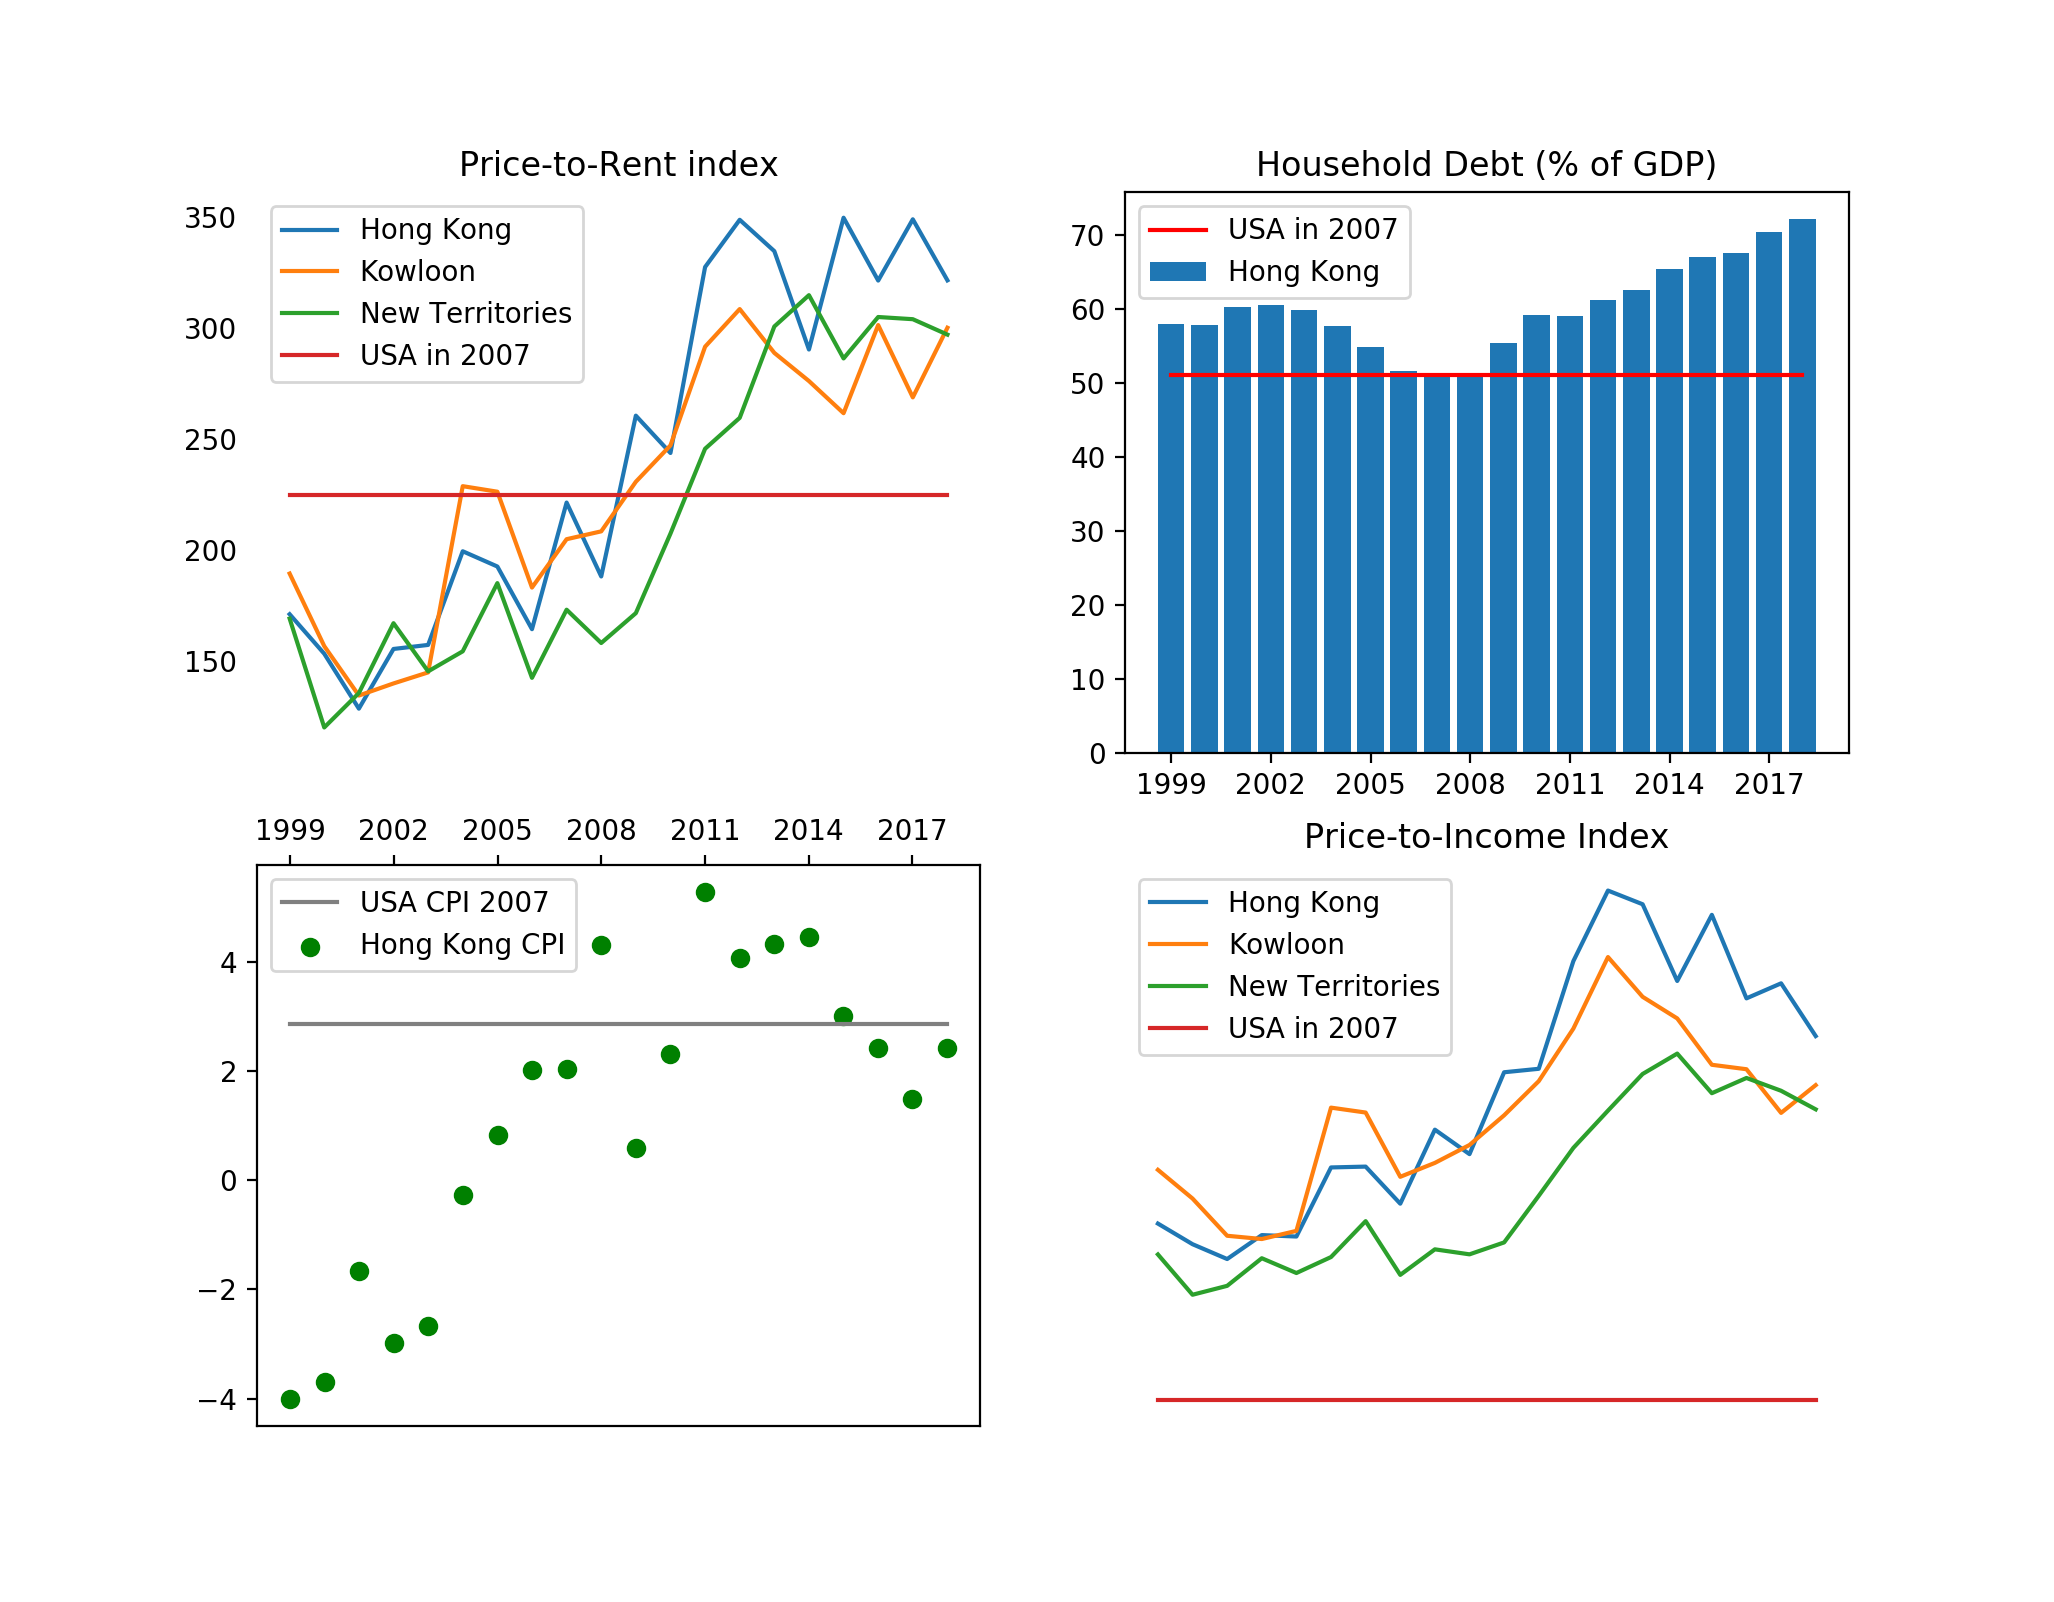

Text(0.5, 1.0, 'Price-to-Rent index')

In [21]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(x_val, y_ptr_hk, '-', x_val, y_ptr_kl, '-', x_val, y_ptr_nt, '-', x_val, us_ptr, '-')
plt.legend(['Hong Kong', 'Kowloon', 'New Territories','USA in 2007'])

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.title('Price-to-Rent index')



In [22]:
plt.subplot(2,2,2)
plt.bar(x_val, y_hdr)
plt.plot(x_val, us_debt, '-', color = 'r')
plt.xticks(x_val[::3])
plt.title('Household Debt (% of GDP)')
plt.legend(['USA in 2007','Hong Kong'])


plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True



In [23]:
plt.subplot(2,2,3)
plt.scatter(x_val, y_cpi, color='g')
plt.plot(x_val, us_cpi, '-', color = 'gray')
plt.legend(['USA CPI 2007', 'Hong Kong CPI'])
plt.xticks(x_val[::3])

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

In [24]:
plt.subplot(2,2,4)
plt.title('Price-to-Income Index')
plt.plot(x_val, y_pir_hk, '-,', x_val, y_pir_kl, '-,', x_val, y_pir_nt, '-', x_val, us_pir, '-')
plt.legend(['Hong Kong', 'Kowloon', 'New Territories', 'USA in 2007'])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
